In [2]:
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
# Path for output files
detectron2_path = '../baselines/Zero_shot_Detectron2/output/'
sam_path = '../baselines/Zero_shot_SAM/output/'
#Read output files
detectron2_ca = open(detectron2_path + 'ca_results.txt', 'r').read().splitlines()
detectron2_glass = open(detectron2_path + 'glass_results.txt', 'r').read().splitlines()
sam_ca = open(sam_path + 'ca_results.txt', 'r').read().splitlines()
sam_glass = open(sam_path + 'glass_results.txt', 'r').read().splitlines()

In [4]:
# Extract from every file each line that starts with Average Precisionç
detectron2_ca = [line.strip() for line in detectron2_ca if line.startswith(' Average Precision')]
detectron2_glass = [line.strip() for line in detectron2_glass if line.startswith(' Average Precision')]
sam_ca = [line.strip() for line in sam_ca if line.startswith(' Average Precision')]
sam_glass = [line.strip() for line in sam_glass if line.startswith(' Average Precision')]

print(detectron2_ca)
print(len(detectron2_ca))

['Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000', 'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.001', 'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002', 'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.003', 'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006', 'Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000']
12


In [5]:
AP = {'AP_seg':0, 'AP050_segm':0, 'AP075_segm':0, 'APs_segm':0, 'APm_segm':0, 'APl_segm':0, 'AP_bbox':0, 'AP50_bbox':0, 'AP75_bbox':0, 'APs_bbox':0, 'APm_bbox':0, 'APl_bbox':0}

detectron2_ca_AP = deepcopy(AP)
detectron2_glass_AP = deepcopy(AP)
sam_ca_AP = deepcopy(AP)
sam_glass_AP = deepcopy(AP)

# Extract the AP values from each line
for i, key in enumerate(AP.keys()):
    detectron2_ca_AP[key] = float(detectron2_ca[i].split(" = ")[1].strip())
    detectron2_glass_AP[key] = float(detectron2_glass[i].split(" = ")[1].strip())
    sam_ca_AP[key] = float(sam_ca[i].split(" = ")[1].strip())
    sam_glass_AP[key] = float(sam_glass[i].split(" = ")[1].strip())

print(detectron2_ca_AP)

{'AP_seg': 0.0, 'AP050_segm': 0.001, 'AP075_segm': 0.0, 'APs_segm': 0.0, 'APm_segm': 0.001, 'APl_segm': 0.0, 'AP_bbox': 0.002, 'AP50_bbox': 0.003, 'AP75_bbox': 0.002, 'APs_bbox': 0.002, 'APm_bbox': 0.006, 'APl_bbox': 0.0}


In [6]:
detectron2_ca_AP_seg = [detectron2_ca_AP['AP_seg'], detectron2_ca_AP['AP050_segm'], detectron2_ca_AP['AP075_segm'], detectron2_ca_AP['APs_segm'], detectron2_ca_AP['APm_segm'], detectron2_ca_AP['APl_segm']]
sam_ca_AP_seg = [sam_ca_AP['AP_seg'], sam_ca_AP['AP050_segm'], sam_ca_AP['AP075_segm'], sam_ca_AP['APs_segm'], sam_ca_AP['APm_segm'], sam_ca_AP['APl_segm']]
detectron2_ca_AP_bbox = [detectron2_ca_AP['AP_bbox'], detectron2_ca_AP['AP50_bbox'], detectron2_ca_AP['AP75_bbox'], detectron2_ca_AP['APs_bbox'], detectron2_ca_AP['APm_bbox'], detectron2_ca_AP['APl_bbox']]
sam_ca_AP_bbox = [sam_ca_AP['AP_bbox'], sam_ca_AP['AP50_bbox'], sam_ca_AP['AP75_bbox'], sam_ca_AP['APs_bbox'], sam_ca_AP['APm_bbox'], sam_ca_AP['APl_bbox']]

print(detectron2_ca_AP_seg)

[0.0, 0.001, 0.0, 0.0, 0.001, 0.0]


/tmp/ipykernel_18483/2679296466.py:35: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


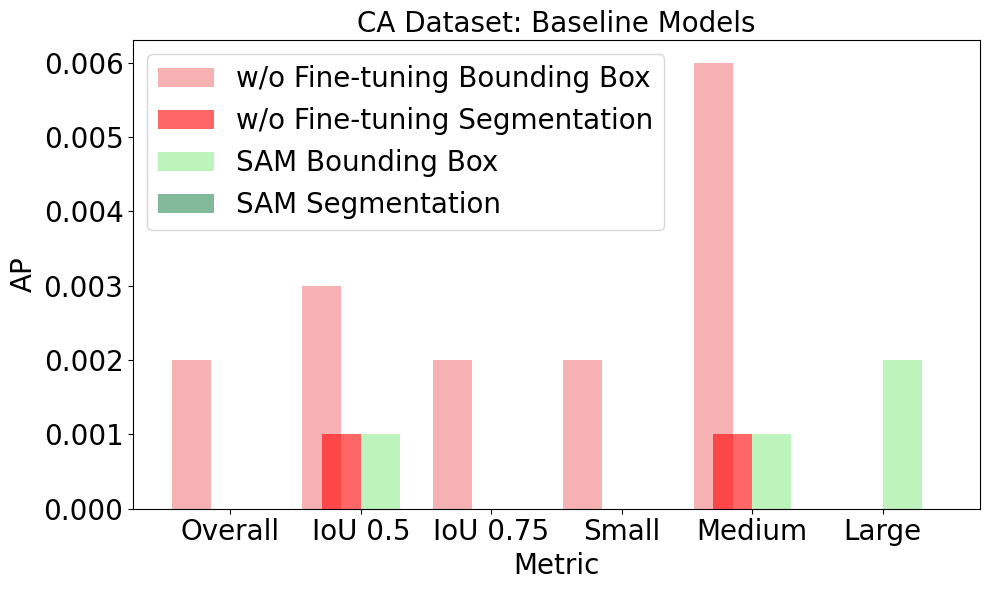

In [17]:
import numpy as np
from matplotlib.ticker import FuncFormatter

x_labels = ['Overall', 'IoU 0.5', 'IoU 0.75', 'Small', 'Medium', 'Large']
# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.3
index = np.arange(len(x_labels))

# Plotting Detectron2 Metrics
ax.bar(index + 0*bar_width, detectron2_ca_AP_bbox, bar_width,
       alpha=0.6, label='w/o Fine-tuning Bounding Box', color='lightcoral')
ax.bar(index + 0.5*bar_width, detectron2_ca_AP_seg, bar_width,
       alpha=0.6, label='w/o Fine-tuning Segmentation', color='red')

# Plotting SAM Metrics
ax.bar(index + 1.5*bar_width, sam_ca_AP_bbox, bar_width,
       alpha=0.6, label='SAM Bounding Box', color='lightgreen')
ax.bar(index + 2*bar_width, sam_ca_AP_seg, bar_width,
       alpha=0.6, label='SAM Segmentation', color='seagreen')

# Customize the plot
ax.set_title('CA Dataset: Baseline Models', fontsize=20)
ax.set_ylabel('AP', fontsize=20)
ax.set_xlabel('Metric', fontsize=20)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(x_labels, rotation=0, fontsize=20)

# Format the y-axis tick labels to round the numbers
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# Set font size for y-axis tick labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax.legend(fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
detectron2_glass_AP_seg = [detectron2_glass_AP['AP_seg'], detectron2_glass_AP['AP050_segm'], detectron2_glass_AP['AP075_segm'], detectron2_glass_AP['APs_segm'], detectron2_glass_AP['APm_segm'], detectron2_glass_AP['APl_segm']]
sam_glass_AP_seg = [sam_glass_AP['AP_seg'], sam_glass_AP['AP050_segm'], sam_glass_AP['AP075_segm'], sam_glass_AP['APs_segm'], sam_glass_AP['APm_segm'], sam_glass_AP['APl_segm']]
detectron2_glass_AP_bbox = [detectron2_glass_AP['AP_bbox'], detectron2_glass_AP['AP50_bbox'], detectron2_glass_AP['AP75_bbox'], detectron2_glass_AP['APs_bbox'], detectron2_glass_AP['APm_bbox'], detectron2_glass_AP['APl_bbox']]
sam_glass_AP_bbox = [sam_glass_AP['AP_bbox'], sam_glass_AP['AP50_bbox'], sam_glass_AP['AP75_bbox'], sam_glass_AP['APs_bbox'], sam_glass_AP['APm_bbox'], sam_glass_AP['APl_bbox']]


/tmp/ipykernel_18483/1976402644.py:30: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


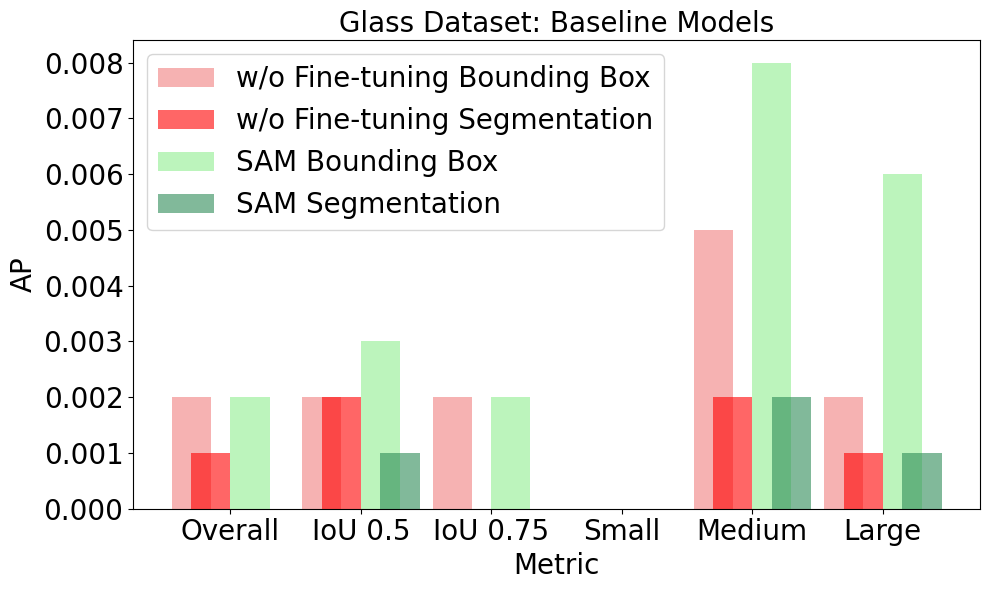

In [18]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.3
index = np.arange(len(x_labels))

# Plotting Detectron2 Metrics
ax.bar(index + 0*bar_width, detectron2_glass_AP_bbox, bar_width,
       alpha=0.6, label='w/o Fine-tuning Bounding Box', color='lightcoral')
ax.bar(index + 0.5*bar_width, detectron2_glass_AP_seg, bar_width,
         alpha=0.6, label='w/o Fine-tuning Segmentation', color='red')

# Plotting SAM Metrics
ax.bar(index + 1.5*bar_width, sam_glass_AP_bbox, bar_width,
       alpha=0.6, label='SAM Bounding Box', color='lightgreen')
ax.bar(index + 2*bar_width, sam_glass_AP_seg, bar_width,
         alpha=0.6, label='SAM Segmentation', color='seagreen')

# Customize the plot

ax.set_title('Glass Dataset: Baseline Models', fontsize=20)
ax.set_ylabel('AP', fontsize=20)
ax.set_xlabel('Metric', fontsize=20)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(x_labels, rotation=0, fontsize=20)

# Set font size for y-axis tick labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax.legend(fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()
